In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]


C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [7]:
#fullyactive = Active.drop(Active[Active['crop_list'].str.contains('UNCULTIVATED') ].index)


#nona = fullyactive.iloc[:,1:61].dropna()

# dont' RUN FROM HERE TO 

In [227]:
Unsurestatus = Active[Active['crop_list'].str.contains('UNCULTIVATED')]

In [335]:
Uncultivated = Active[Active['crop_list'] == 'UNCULTIVATED AG']

In [369]:
letstrain = pd.concat([unknowns,Uncultivated])
fullx = letstrain.iloc[:,1:61].dropna()
fully = letstrain.loc[fullx.index,'is_active']

In [370]:
fully = np.where(letstrain.loc[fullx.index,'crop_list'].str.contains('Unknown'),0,1)
fully

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
from sklearn.metrics import confusion_matrix

In [292]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()

In [935]:
(tn,fp,fn,tp)


(300, 53, 45, 2500)

In [299]:

testingdf = Unsurestatus.iloc[:,1:61].dropna()

preds = clf.predict(Unsurestatus.iloc[:,1:61].dropna())







In [300]:
unsurepreds = Unsurestatus.loc[testingdf.index,:]

In [878]:
#unsurepreds[unsurepreds['isactiveimpute'] == 0][['crop_list','OBJECTID']]


set(fullyactive.crop_list)

{'ALFALFA',
 'ALFALFA GRASS M',
 'ALFALFA, SAFFLOWER',
 'ALFALFA, WHEAT',
 'ALMOND',
 'ALMOND, APRICOT, CHERRY, NECTARINE, PEACH, PRUNE',
 'ALMOND, BEEHIVE',
 'ALMOND, FORAGE HAY/SLGE',
 'APPLE',
 'APPLE, APRICOT, CHERRY, PEACH',
 'APRICOT',
 'APRICOT, CHERRY, PEACH',
 'APRICOT, NECTARINE, PEACH',
 'BARLEY',
 'BEAN DRIED',
 'BEAN DRIED, WHEAT',
 'BEEHIVE',
 'BEEHIVE, UNCUL NON-AG',
 'BLACKBERRY',
 'BLUEBERRY',
 'BROCCOLI, MELON',
 'CABBAGE SEED, ONION SEED, CARROT SEED',
 'CANTALOUPE',
 'CHERRY',
 'CHESTNUT',
 'CITRUS',
 'COMM. FUMIGATN',
 'CORN FOR/FOD',
 'CORN SEED, SAFFLOWER SEED',
 'CORN, HUMAN CON',
 'CUCUMBER',
 'CUCUMBER SEED',
 'DITCH, BANK',
 'FIG',
 'FORAGE HAY/SLGE',
 'FRUIT, BERRY',
 'FRUIT, BERRY, CHERRY, POMEGRANATE',
 'FUMIGATN, OTHER',
 'GARBANZO BEAN',
 'GP-FLWRNG PLANT',
 'GRAPE',
 'GRAPE, WINE',
 'GRASS SEED, UNCUL NON-AG',
 'HEMP/CANNABIS',
 'HOPS',
 'INDUSTRIAL SITE',
 'KIWI',
 'LANDSCAPE MAIN',
 'MELON SEED',
 'N-GRNHS PLANT',
 'N-GRNHS TRANSPL',
 'N-OUTDR FLOWERS

In [535]:
#CbandDensity= pd.read_csv('ColorbandsDF.csv',)
nonones = CbandDensity[pd.notna(CbandDensity['crop_list'])]
#hold = pd.DataFrame(['UNCULTIVATED' in i for i in nonones.crop_list ],index=nonones.index)


tomatoandalfalfa = fullyactive[fullyactive.crop_list.str.contains('ALMOND') | fullyactive.crop_list.str.contains('WALNUT')] 
colorbands = tomatoandalfalfa.iloc[:,:61]
colorbands['crop_list'] = tomatoandalfalfa.crop_list
colorbands.loc[colorbands.crop_list.str.contains('ALMOND'),'crop_list']  = 'ALMOND'
nona= colorbands.dropna()
fullx = nona.iloc[:,1:-1]
fully = np.where(colorbands['crop_list'] == 'ALMOND',0,1)
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clfs = LogisticRegression()
clfs.fit(X_train,Y_train)
sv = clfs.predict(X_test)
clfs.score(X_test,Y_test)

0.8685121107266436

In [521]:
clfs.coef_.argmax()

59

In [522]:
X_test.columns[59]

'Band10firstquart'

In [447]:
j = 0
for i in clfs.coef_[0]:
    
    print(j,i)
    j +=1

0 0.0025749447329205854
1 0.003997120152933425


In [34]:
nonones.loc[nonones['crop_list'].str.contains('UNCULTIVATED'),'crop_list'] = 'UNCULTIVATED'

/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [219]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9658385093167702

In [552]:
tomats = Active[Active.crop_list.str.contains('TOMATO')]

# TO HERE

In [4]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [5]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [6]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'








C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C

In [7]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'

nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'











C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marce\Anac

In [8]:
OAT 338
SAFFLOWER 348
CORN 355
WALNUT 600
GRAPE 676
RICE 773
UNKNOWN 1021
ALMOND 1099
SUNFLOWER SEED 1216
WHEAT 1323
UNCULTIVATED AG 1444
ALFALFA 1541
TOMATO PROCESS 1702

SyntaxError: invalid syntax (<ipython-input-8-786198a09a3c>, line 1)

In [9]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

## Marcel Look Here for stuff

In [11]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [14]:
nonorg[['crop_list','code']][nonorg['crop_list'] != 0]

{"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"Corn":2,}

{'WALNUT': 9,
 'ALFALFA': 0,
 'OAT': 4,
 'GRAPE': 3,
 'ALMOND': 1,
 'WHEAT': 10,
 'RICE': 5,
 'Corn': 2}

In [15]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()

m = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1)

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [16]:
preds = tester.predict(X_test)

print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))



0.6281370656370656
0.880550193050193
0.8923745173745173
0.8800675675675675


In [17]:
misclassified = np.where(Y_test != RFC.predict(X_test))


In [18]:
a = X_test.iloc[misclassified].index

In [111]:
b = pd.DataFrame(lottacrop.iloc[misclassified][["OBJECTID", "crop_list"]]).reset_index(drop = True)
b

,OBJECTID,crop_list
0,2428538,SAFFLOWER
1,2443847,WALNUT
2,2770079,ALFALFA
3,2771103,ALFALFA
4,2771489,ALFALFA
5,2875156,ALMOND
6,2875159,SUNFLOWER
7,2875946,ALMOND
8,2875950,WHEAT
9,2876572,TOMATO


In [100]:
b = b.dropna()
b.crop_list[b['crop_list'].str.contains('ALMOND')] = 'ALMOND'
b.crop_list[b['crop_list'].str.contains('GRAPE')] = 'GRAPE'
b.crop_list[b['crop_list'].str.contains('OAT')] = 'OAT'
b.crop_list[b['crop_list'].str.contains('RICE')] = 'RICE'
b.crop_list[b['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
b.crop_list[b['crop_list'].str.contains('WALNUT')] = 'WALNUT'
b.crop_list[b['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

b.crop_list[b['crop_list'].str.contains('CORN')] = 'CORN'
b.crop_list[b['crop_list'].str.contains('WHEAT')] = 'WHEAT'
b.crop_list[b['crop_list'].str.contains('TOMATO')] = 'TOMATO'

b.crop_list[b['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\marce\Anaconda3\lib\site-packages\ipyke

In [101]:
import geopandas as gpd

In [112]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]
type(cropfields1["OBJECTID"][0])

numpy.int64

In [113]:
type(b["OBJECTID"][0])

numpy.int64

In [114]:
cropfields1.loc[cropfields1["OBJECTID"] == b["OBJECTID"][0]]

,OBJECTID,geometry
27,2428538,"POLYGON ((595424.7293462916 4266354.60629323, ..."


In [115]:
c =gpd.GeoDataFrame(b.merge(cropfields1, on = ['OBJECTID'], how = 'left'))
c.crs = {'init': 'epsg:26910'}

In [116]:
c= c.to_crs("+proj=longlat +datum=WGS84 +no_defs ")

In [117]:
c["crop_list"]

0      SAFFLOWER
1         WALNUT
2        ALFALFA
3        ALFALFA
4        ALFALFA
5         ALMOND
6      SUNFLOWER
7         ALMOND
8          WHEAT
9         TOMATO
10        TOMATO
11        TOMATO
12        TOMATO
13        TOMATO
14     SUNFLOWER
15     SUNFLOWER
16        TOMATO
17         GRAPE
18        TOMATO
19         WHEAT
20         GRAPE
21         GRAPE
22       ALFALFA
23       ALFALFA
24     SUNFLOWER
25        ALMOND
26        TOMATO
27         GRAPE
28          RICE
29       ALFALFA
         ...    
467         RICE
468       TOMATO
469      ALFALFA
470        WHEAT
471    SUNFLOWER
472    SUNFLOWER
473       TOMATO
474       TOMATO
475       TOMATO
476    SUNFLOWER
477       ALMOND
478    SAFFLOWER
479       TOMATO
480      ALFALFA
481       TOMATO
482        WHEAT
483        WHEAT
484         CORN
485    SUNFLOWER
486        GRAPE
487       ALMOND
488         CORN
489        WHEAT
490        WHEAT
491        GRAPE
492    SAFFLOWER
493          OAT
494    SAFFLOW

In [118]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(44.3617,0.5,'Longitude')

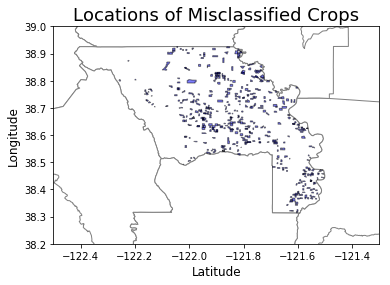

In [119]:
ax = yolo.plot(color = "white", edgecolor = "gray")
c.plot(ax =ax, edgecolor = 'black',color = 'blue', alpha = 0.5)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Locations of Misclassified Crops", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

Text(44.3617,0.5,'Longitude')

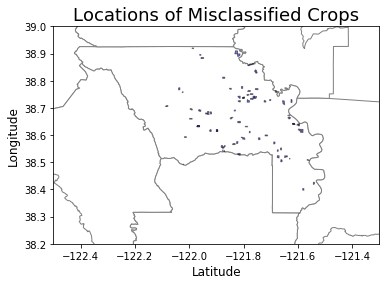

In [121]:
tomato_mis = c[c["crop_list"] == "TOMATO"]
ax = yolo.plot(color = "white", edgecolor = "gray")
tomato_mis.plot(ax =ax, edgecolor = 'black',color = 'blue', alpha = 0.5)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Locations of Misclassified Crops", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

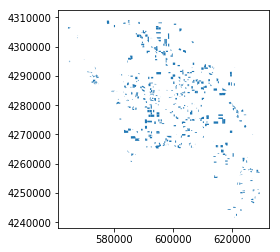

In [75]:
#tomato, alfalfa, sunflower

In [20]:
confusion_matrix(Y_test,clf.predict(X_test))

array([[588,  13,   0,   4,   0,   0,   3,   0,  13,   0,   5],
       [  2, 387,   0,  12,   1,   0,   0,   2,   0,   3,   8],
       [  5,   2, 130,   1,   7,   1,   5,   4,  15,   1,   3],
       [  8,  25,   0, 219,   2,   0,   1,   0,   1,   5,   8],
       [  4,   8,   0,   1, 105,   2,   1,   0,   0,   0,  22],
       [  6,   1,   0,   1,   3, 281,   3,   5,   8,   2,   3],
       [  4,   2,   2,   3,   3,   0, 114,   3,  12,   0,  12],
       [  9,   8,   7,   0,   0,   3,   5, 424,  26,   0,   3],
       [ 11,   1,  11,   0,   0,   1,   0,  43, 687,   0,   6],
       [  7,  42,   0,  16,   0,   0,   0,   0,   2, 181,   3],
       [ 11,   6,   1,   2,   1,   0,   5,   4,  12,   1, 510]])

In [81]:
confusion_matrix(Y_test,clf.predict(X_test))

array([[560,  12,   0,   6,   7,   0,   4,   2,  17,   0,   6],
       [  3, 366,   1,  15,   5,   0,   0,   2,   2,   8,  13],
       [  2,   5, 126,   2,   3,   1,   6,   2,  14,   0,   7],
       [  4,  26,   0, 224,   1,   0,   0,   0,   3,   3,   5],
       [  7,  12,   0,   2,  96,   2,   2,   0,   0,   0,  22],
       [  7,   1,   0,   2,   0, 301,   4,   5,   3,   0,   3],
       [  7,   2,   3,   3,   1,   0, 126,   1,  12,   0,  14],
       [ 10,   7,   7,   0,   1,   4,   4, 414,  28,   1,   3],
       [ 21,   2,  10,   1,   0,   0,   0,  34, 689,   0,   6],
       [  4,  29,   0,  12,   0,   0,   0,   3,   1, 177,   3],
       [ 12,   9,   1,   3,   6,   0,   6,   3,  16,   0, 516]])

In [21]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.68290773, 6.3773884 , 5.42152768, 6.00651255, 5.40756109,
       5.78165692, 5.3790177 , 6.4844199 , 6.8418155 , 5.81146366,
       6.47171971])

In [122]:
pk = extra.predict_proba(X_test)
pk * log(pk)

NameError: name 'log' is not defined

In [20]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes
fullx = lottacrop.iloc[:,1:61].dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

/home/marcel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)


tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [24]:
importances = extra.feature_importances_
std = np.std([extra.feature_importances_ for tree in extra.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [25]:
X_train.shape[1]
importances[indices][:58]

array([0.04307993, 0.04105589, 0.03918572, 0.03659485, 0.03359419,
       0.03289997, 0.03277012, 0.03169145, 0.03112004, 0.02952319,
       0.02919816, 0.02874238, 0.02767337, 0.0266987 , 0.02620187,
       0.02607968, 0.02460791, 0.02412403, 0.02378635, 0.02307589,
       0.02265635, 0.02247493, 0.02168421, 0.02108462, 0.02103608,
       0.02075089, 0.02059096, 0.02024463, 0.0194381 , 0.01855488,
       0.01837745, 0.01757303, 0.0167016 , 0.01650516, 0.01613722,
       0.01543345, 0.01524107, 0.015197  , 0.01504396, 0.01495988,
       0.01418389, 0.00131376, 0.00095572, 0.00088086, 0.00071299,
       0.00056363, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Feature ranking:
1. feature 7 (0.043080)
2. feature 16 (0.041056)
3. feature 9 (0.039186)
4. feature 13 (0.036595)
5. feature 15 (0.033594)


TypeError: 'int' object is not subscriptable

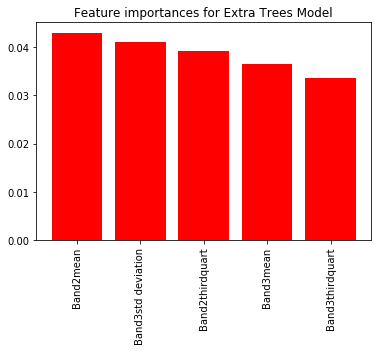

In [26]:
print("Feature ranking:")

for f in range(5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Extra Trees Model")
plt.bar(range(5), importances[indices][:5],
       color="r", yerr=std[indices][:5], align="center")
plt.xticks(range(5), X_train.columns[indices[:5]],rotation = 90)
plt.ylabel = 'Importance'
plt.xlabel = 'Features'
plt.xlim([-1, X_train.shape[1][:5]])

plt.show()

In [27]:
extrapreds = extra.predict(X_test)

In [28]:
confusion_matrix(Y_test,extrapreds)

array([[565,  11,   0,   9,   5,   0,   3,   3,   6,   0,  13],
       [ 11, 407,   0,   6,   3,   0,   0,   3,   1,   7,   7],
       [  3,   4, 124,   1,   6,   0,   0,   3,   3,   3,   4],
       [ 21,  14,   0, 214,   3,   1,   0,   3,   6,   3,   4],
       [  5,   5,   0,   0, 121,   0,   0,   0,   0,   0,  18],
       [  2,   0,   2,   1,   1, 303,   4,   4,   0,   0,   1],
       [  9,   0,   5,   4,   3,   1, 126,   6,   4,   0,  11],
       [ 10,   2,   8,   0,   2,   2,   6, 434,  23,   0,   9],
       [ 15,   1,   9,   3,   3,   2,   2,  36, 683,   0,  10],
       [ 21,  36,   0,   3,   2,   2,   1,   0,   4, 165,   3],
       [  8,  14,   4,   1,   9,   0,   3,   6,   8,   0, 478]])

In [29]:
preds = tester.predict(X_test)
print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6247586872586872
0.8458011583011583
0.8735521235521235
0.8638996138996139


In [30]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.71656357, 6.45089349, 5.44641355, 6.00467072, 5.4610132 ,
       5.87926263, 5.41568224, 6.51701202, 6.83283049, 5.83653683,
       6.49077292])

In [711]:
confusion_matrix(Y_test,preds)

array([[555,   6,  10,   1,   0,   1,   0],
       [ 24, 315,  10,   8,   0,   0,   9],
       [ 20,  11, 207,   0,   0,   0,   5],
       [  7,   6,   1,  29,   1,   0,   2],
       [  5,   2,   2,   0, 153,   0,   1],
       [  2,   1,   0,   0,   0,  11,   0],
       [ 13,  21,   9,   0,   6,   0, 171]])

Alfalfa:0
Almond:1
Grape:2
Oat:3
Rice:4
Sunflower:5
Tomato:6
Walnut :7


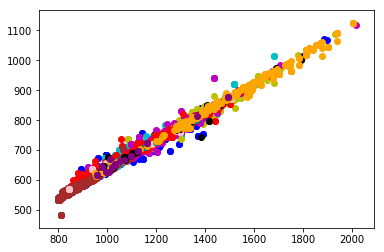

In [911]:
colors = ['b', 'c', 'y', 'm', 'r','brown','pink','teal','black','orange','purple']
for i,j in zip(set(nonorg.crop_list),colors):
    plt.scatter(nonorg.loc[nonorg['crop_list'] == i,['Band2thirdquart']],nonorg.loc[nonorg['crop_list'] == i,['Band2mean']],color = j)